In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import os

def load_graph(db_file):
    """
    Load the graph from the database file, or create a new one if the file doesn't exist.
    """
    if os.path.exists(db_file):
        with open(db_file, "r") as f:
            data = json.load(f)
            G = nx.readwrite.json_graph.adjacency_graph(data)  # Properly reconstruct the graph
            print(f"Loaded database from {db_file}.")
    else:
        G = nx.DiGraph()
        print("No database file found. Starting a new graph.")
    return G

def save_graph(graph, db_file):
    """
    Save the graph to the database file in JSON format.
    """
    with open(db_file, "w") as f:
        json.dump(nx.readwrite.json_graph.adjacency_data(graph), f)
    print(f"Database updated and saved to {db_file}.")

def add_relationship(graph, db_file):
    """
    Prompt the user to input reporting relationships and update the graph.
    """
    print("Enter reporting relationships in the format 'Employee -> Manager'.")
    print("Type 'done' when you are finished.")
    while True:
        relationship = input("Enter relationship: ").strip()
        if relationship.lower() == "done":
            break
        if "->" in relationship:
            employee, manager = map(str.strip, relationship.split("->"))
            graph.add_edge(manager, employee)
            save_graph(graph, db_file)  # Save after every update
        else:
            print("Invalid format. Please use 'Employee -> Manager'.")

def remove_relationship(graph, db_file):
    """
    Prompt the user to input a relationship to remove and update the graph.
    """
    print("Enter the relationship to remove in the format 'Employee -> Manager'.")
    print("Type 'done' when you are finished.")
    while True:
        relationship = input("Enter relationship to remove: ").strip()
        if relationship.lower() == "done":
            break
        if "->" in relationship:
            employee, manager = map(str.strip, relationship.split("->"))
            if graph.has_edge(manager, employee):
                graph.remove_edge(manager, employee)
                save_graph(graph, db_file)  # Save after every update
                print(f"Removed relationship: {employee} -> {manager}")
            else:
                print(f"No such relationship: {employee} -> {manager}")
        else:
            print("Invalid format. Please use 'Employee -> Manager'.")


def draw_tree(graph):
    """
    Draw a tree diagram from the given graph.
    """
    plt.figure(figsize=(12, 8))
    pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")  # Tree-like layout
    nx.draw(graph, pos, with_labels=True, arrows=False, node_size=2000, 
            node_color="lightblue", font_size=10, font_weight="bold")
    plt.title("Reporting Tree Diagram", fontsize=16)


def replace_person(graph, db_file):
    """
    Replace a node (person) with a new name, preserving all connections.
    """
    old_name = input("Enter the name of the person to replace: ").strip()
    new_name = input("Enter the new name: ").strip()
    if old_name in graph:
        graph = nx.relabel_nodes(graph, {old_name: new_name}, copy=False)
        save_graph(graph, db_file)
        print(f"Replaced '{old_name}' with '{new_name}'.")
    else:
        print(f"Node '{old_name}' not found.")

def remove_person(graph, db_file):
    """
    Completely remove a node (person) and all its connections.
    """
    name = input("Enter the name of the person to remove: ").strip()
    if name in graph:
        graph.remove_node(name)
        save_graph(graph, db_file)
        print(f"Removed '{name}' and all its connections.")
    else:
        print(f"Node '{name}' not found.")

No database file found. Starting a new graph.
Enter reporting relationships in the format 'Employee -> Manager'.
Type 'done' when you are finished.
Database updated and saved to ./db_files/Working_tree_test_db.json.


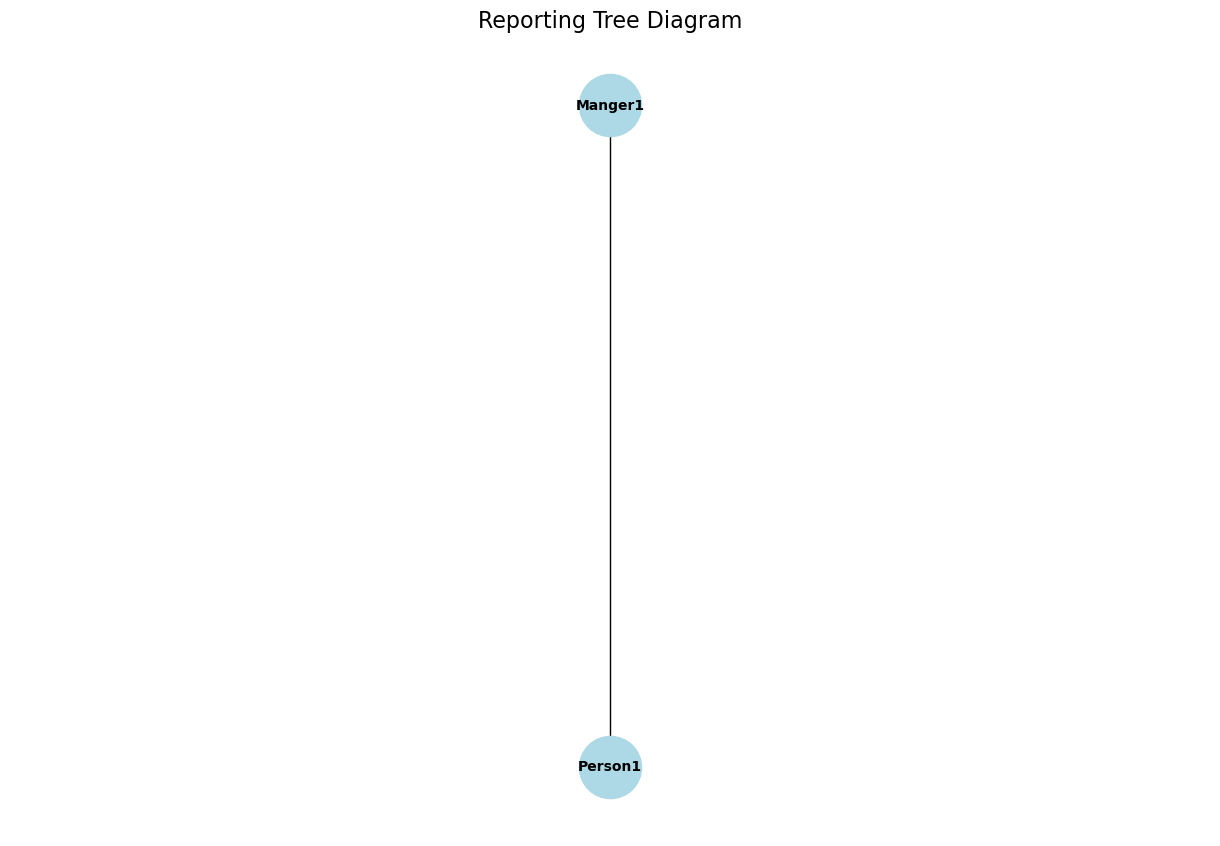

In [3]:

# Main execution
DB_FILE = "./db_files/Working_tree_test_db.json"  # Path to the database file

# Load the graph from the database or create a new one
G = load_graph(DB_FILE)

# Build or update the graph interactively
add_relationship(G, DB_FILE)

# Draw the resulting tree
draw_tree(G)

Enter reporting relationships in the format 'Employee -> Manager'.
Type 'done' when you are finished.
Database updated and saved to ./db_files/Working_tree_test_db.json.
Database updated and saved to ./db_files/Working_tree_test_db.json.
Database updated and saved to ./db_files/Working_tree_test_db.json.
Database updated and saved to ./db_files/Working_tree_test_db.json.
Database updated and saved to ./db_files/Working_tree_test_db.json.


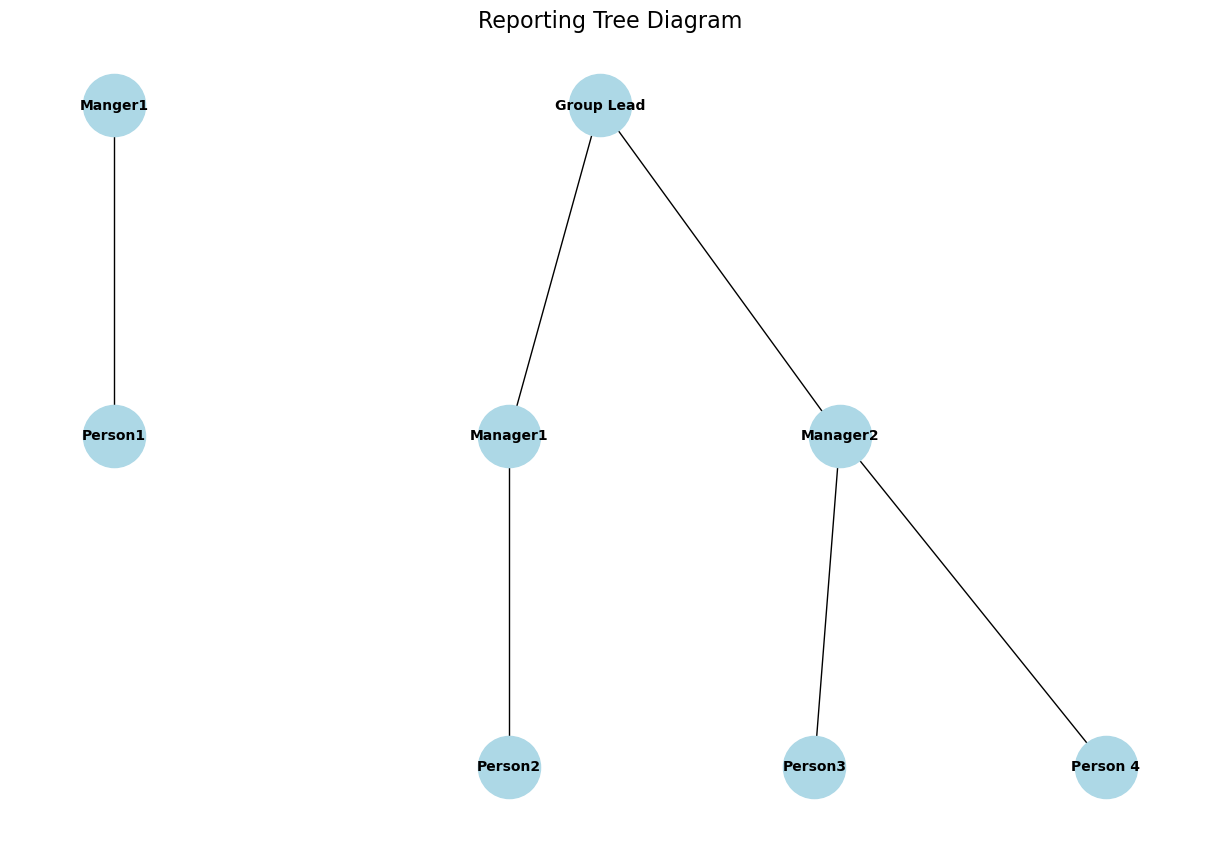

In [4]:
# Build or update the graph interactively
add_relationship(G, DB_FILE)

# Draw the resulting tree
draw_tree(G)

In [16]:
remove_relationship(G,DB_FILE)
draw_tree(G)

Enter the relationship to remove in the format 'Employee -> Manager'.
Type 'done' when you are finished.


Enter relationship to remove:  unconnected person1 -> mystery manager


Database updated and saved to ./aux_data/Working_tree_test_db.json.
Removed relationship: unconnected person1 -> mystery manager


Enter relationship to remove:  done


Database updated and saved to ./db_files/Working_tree_test_db.json.
Replaced 'Manger1' with 'Manager1'.


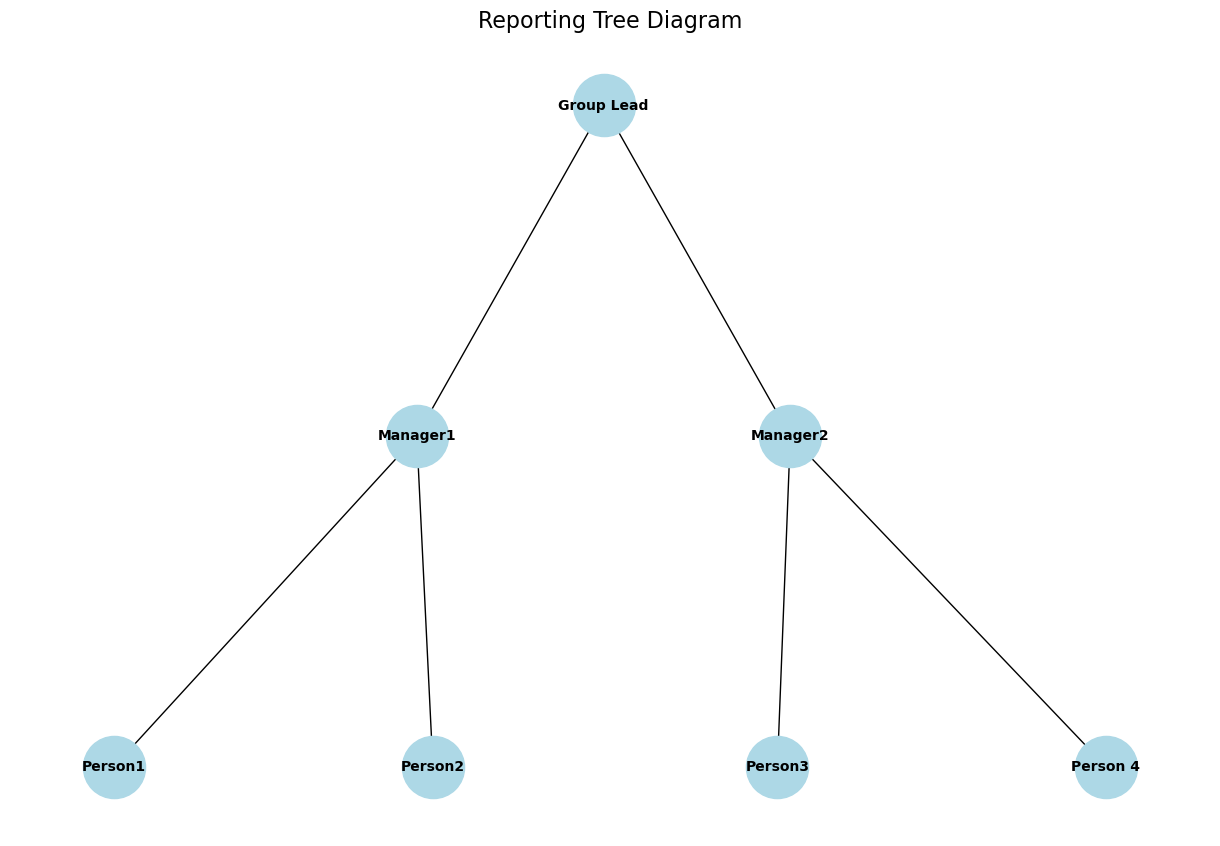

In [5]:
replace_person(G, DB_FILE)
draw_tree(G)

Node '' not found.


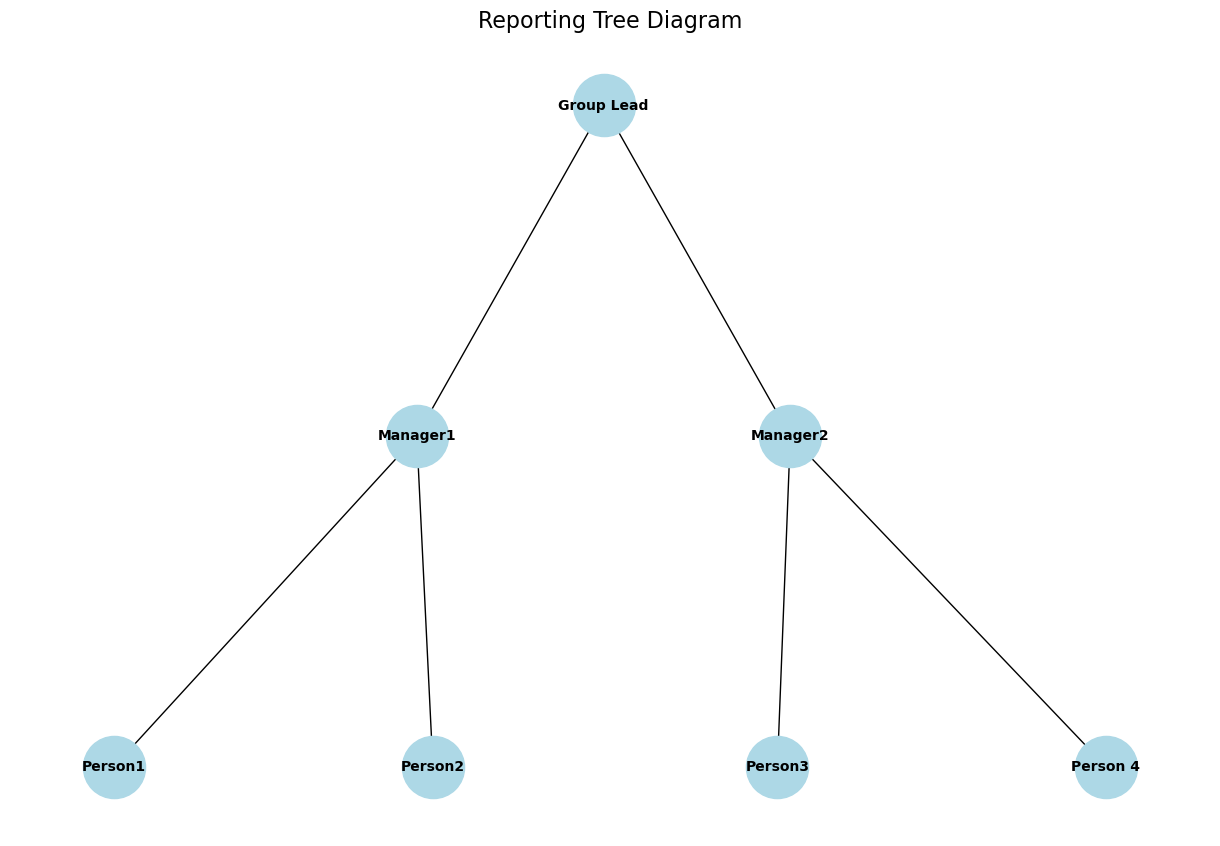

In [6]:
remove_person(G, DB_FILE)
draw_tree(G)